In [ ]:
# 1. Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
# Define the dataset path
dataset_path = '/content/drive/MyDrive/Pinapple_project/pine apple/Pine Apple/Digital Image processing/MAIN DATASET'

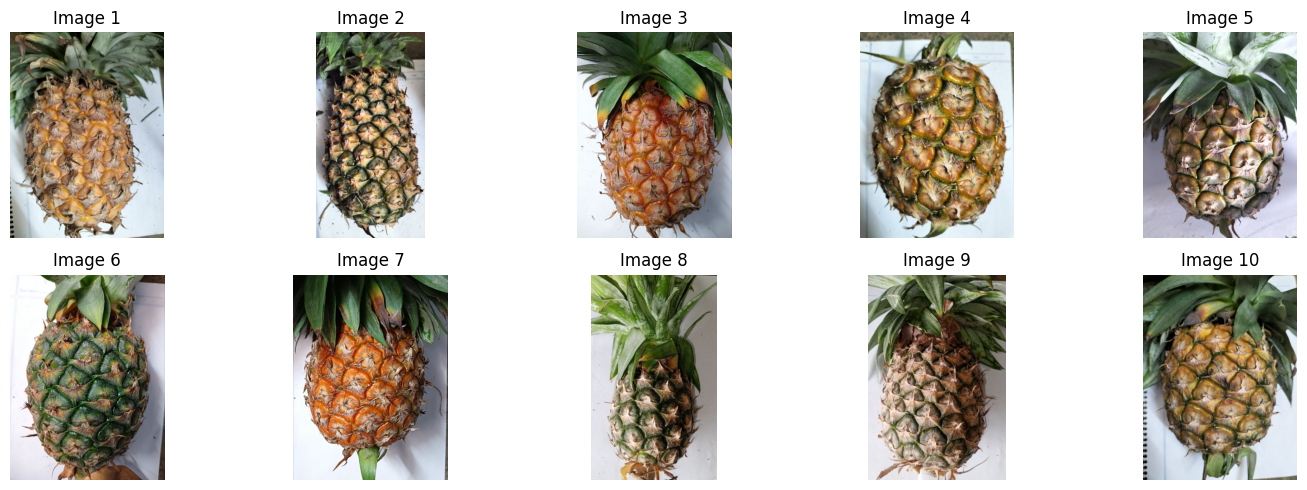

In [ ]:
# Get the list of image file names in the dataset folder with .jpg extension only
image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]

if not image_files:
    print("No images found in the specified dataset path.")
else:
    num_images = min(10, len(image_files))
    plt.figure(figsize=(15, 5))

    for i in range(num_images):
        image_path = os.path.join(dataset_path, image_files[i])
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(2, 5, i + 1)
        plt.imshow(image_rgb)
        plt.title(f"Image {i+1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

Resizing

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

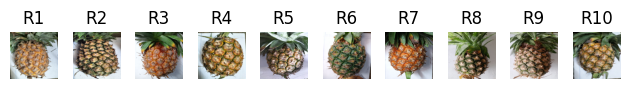

In [ ]:
for i in range(num_images):

    image_path = os.path.join(dataset_path, image_files[i])
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (200, 200))

    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title(f"R{i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Image Rotation

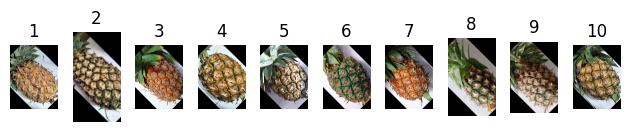

In [ ]:
for i in range(num_images):

    image_path = os.path.join(dataset_path, image_files[i])
    image = cv2.imread(image_path)

    (h, w) = image.shape[:2]  # Apply Rotation (e.g., rotate by 45 degrees)
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))


    # Display the rotated image
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.title(f"{i+1}")
    plt.axis("off")


plt.tight_layout()
plt.show()

Histogram Equalization

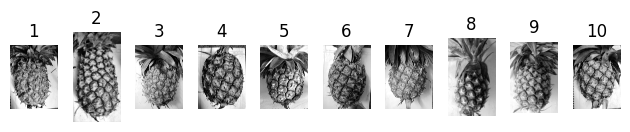

In [ ]:
for i in range(num_images):
        # Load the original image and convert it to grayscale
        image_path = os.path.join(dataset_path, image_files[i])
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply Histogram Equalization
        equalized_image = cv2.equalizeHist(gray_image)


        # Display the histogram-equalized image
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(equalized_image, cmap='gray')
        plt.title(f"{i+1}")
        plt.axis("off")

plt.tight_layout()
plt.show()

Morphological Operation (Erosion)

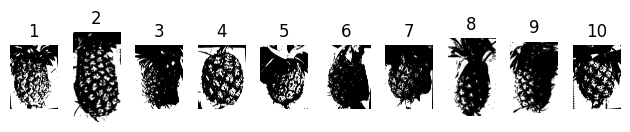

In [ ]:
for i in range(num_images):
        # Load the original image and convert it to grayscale
        image_path = os.path.join(dataset_path, image_files[i])
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding to create a binary image
        _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

        # Define the kernel for erosion
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

        # Apply Morphological Erosion
        eroded_image = cv2.erode(binary_image, kernel, iterations=1)



        # Display the eroded image
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(eroded_image, cmap='gray')
        plt.title(f"{i+1}")
        plt.axis("off")

plt.tight_layout()
plt.show()

Grayscale Conversion

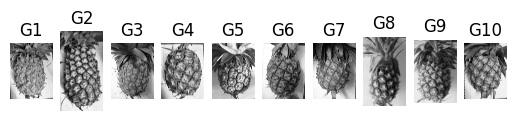

In [ ]:
for i in range(num_images):
        # Load the original image
        image_path = os.path.join(dataset_path, image_files[i])
        image = cv2.imread(image_path)

        # Apply Grayscale Conversion
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Display the grayscale image
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(gray_image, cmap='gray')
        plt.title(f"G{i+1}")
        plt.axis("off")

 Edge Detection (Canny)

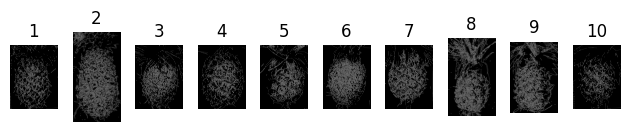

In [ ]:
for i in range(num_images):
        # Load the original image and convert it to grayscale
        image_path = os.path.join(dataset_path, image_files[i])
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply Canny Edge Detection
        edges = cv2.Canny(gray_image, 100, 200)


        # Display the edge-detected image
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(edges, cmap='gray')
        plt.title(f"{i+1}")
        plt.axis("off")

plt.tight_layout()
plt.show()

Color Space Conversion (HSV)

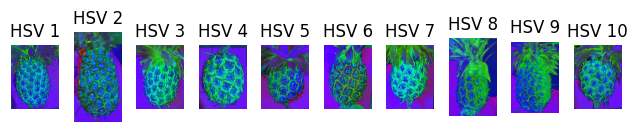

In [ ]:
for i in range(num_images):
        # Load the original image
        image_path = os.path.join(dataset_path, image_files[i])
        image = cv2.imread(image_path)

        # Apply HSV Color Space Conversion
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Display the HSV image
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(hsv_image)
        plt.title(f"HSV {i+1}")
        plt.axis("off")

plt.tight_layout()
plt.show()

Comparative analysis of the specified techniques

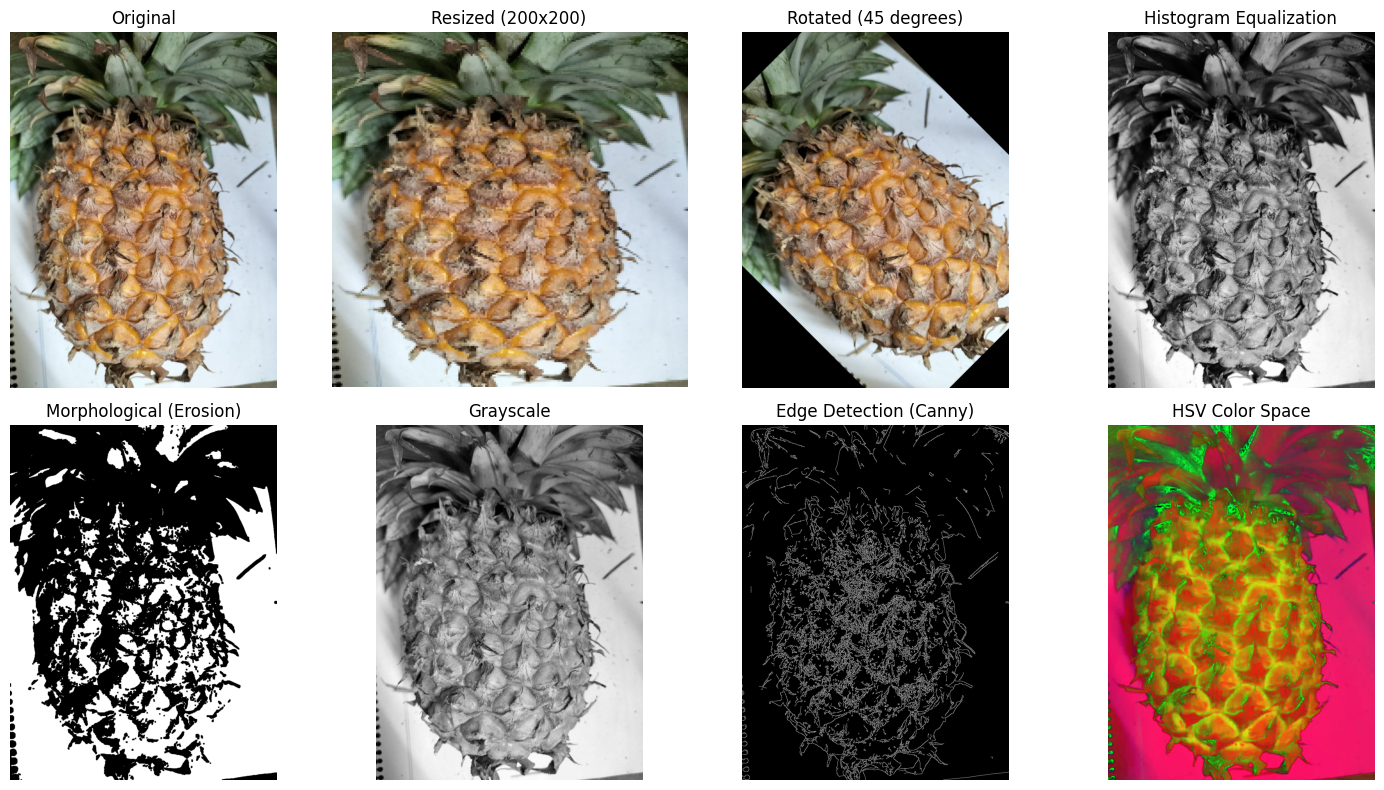

In [ ]:
# Display all processed images in a grid for comparison
titles = [
    "Original", "Resized (200x200)", "Rotated (45 degrees)",
    "Histogram Equalization", "Morphological (Erosion)",
    "Grayscale", "Edge Detection (Canny)", "HSV Color Space"
]

images = [
    image, resized, rotated, equalized, eroded,
    gray_image, edges, hsv
]

# Set up the plot with a 2x4 grid layout
plt.figure(figsize=(15, 8))

for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    if len(images[i].shape) == 2:  # Grayscale or binary images
        plt.imshow(images[i], cmap='gray')
    else:  # Color images
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()